In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
import random

Model C <br> At every time step a random vertex from already existing vertices is selected and duplicated together with all edges, such that every edge of the vertex <br>
1)is copied with probability $q$ <br>
2)is rewired to any other randomly selected vertex with probability $1-q$ <br>

In [5]:
def model_C(N, p):
    G = nx.Graph()
    G.add_edge(0,1)
    nodes=G.nodes()
    i=2
    while i<N:
        node=random.choice(G.nodes())
        G.add_node(i)
        for nbr in G.neighbors(node):
            if random.random() < p:
                G.add_edge(i, nbr)
            else:
                stranger=random.choice(G.nodes())
                while stranger==i:
                    stranger=random.choice(G.nodes())
                G.add_edge(i, stranger)
        i+=1
    return G

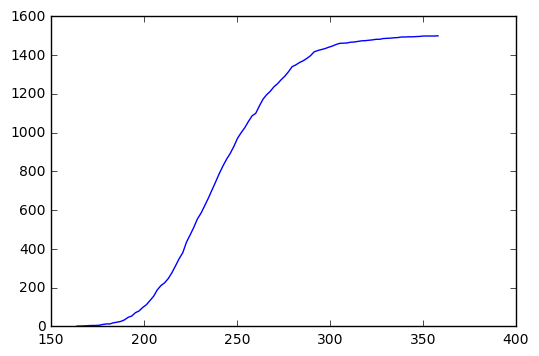

In [180]:
values, base = np.histogram(list(model_C(1500,0.5).degree().values()), bins=100)
cumulative = np.cumsum(values)
plt.plot(base[:-1], cumulative, c='blue')
plt.title('CDF for model C')

plt.legend()
plt.show()

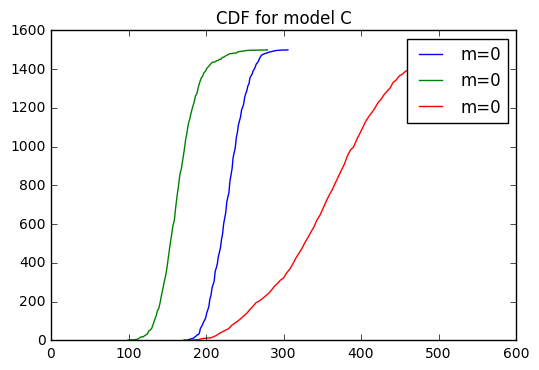

In [11]:
for i in p:
    values, base = np.histogram(list(model_C(1500,i).degree().values()), bins=100)
    cumulative = np.cumsum(values)
    plt.plot(base[:-1], cumulative, label = u'm=%d'% i)
plt.title('CDF for model C')

plt.legend()
plt.show()

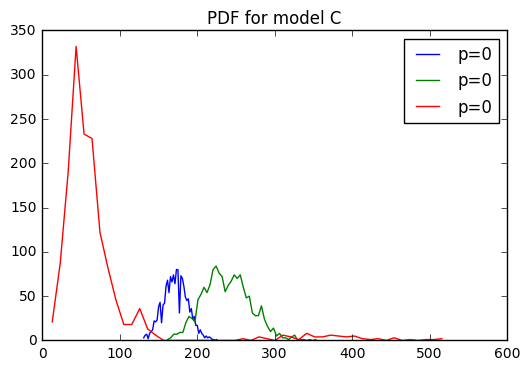

In [10]:
for i in p:
    values, base = np.histogram(list(model_C(1500,i).degree().values()), bins=50)
    plt.plot(base[:-1], values, label = u'p=%d'% i)
plt.title('PDF for model C')

plt.legend()
plt.show()

In [2]:
p=[0.2, 0.5, 0.8]
R=range(1000, 4000, 500)

## Clustering coefficient, path length (number of nodes)

In [231]:
a=[]
b=[]
for prob in p:
    clusters=[]
    paths=[]
    for size in R:
        G=model_C(size, prob)
        clusters.append(nx.average_clustering(G))
        paths.append(nx.average_shortest_path_length(G))
    a.append(clusters)
    b.append(paths)

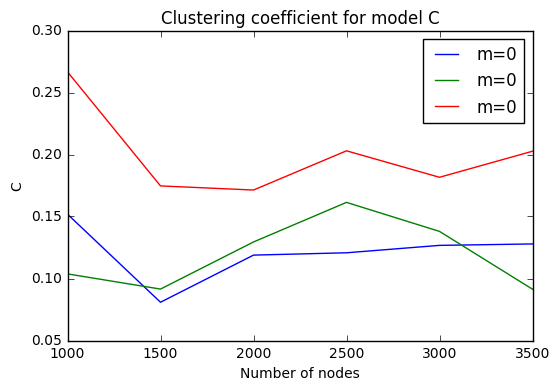

In [232]:
plt.plot(R, a[0], label = u'm=%d'% p[0])
plt.plot(R, a[1], label = u'm=%d'% p[1])
plt.plot(R, a[2], label = u'm=%d'% p[2])
plt.title('Clustering coefficient for model C')
plt.xlabel(u'Number of nodes')
plt.ylabel(u'C')
plt.legend()
plt.show()

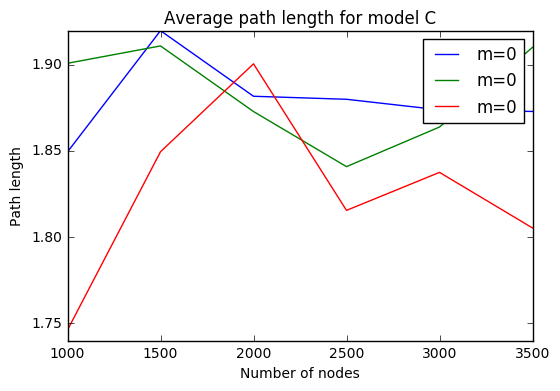

In [233]:
plt.plot(R, b[0], label = u'm=%d'% p[0])
plt.plot(R, b[1], label = u'm=%d'% p[1])
plt.plot(R, b[2], label = u'm=%d'% p[2])
plt.title('Average path length for model C')
plt.xlabel(u'Number of nodes')
plt.ylabel(u'Path length')
plt.legend()
plt.show()

## Degree value ("age")

In [13]:
def model_C_deg(N, p):
    G = nx.Graph()
    G.add_edge(0,1)
    nodes=G.nodes()
    i=2
    deg=[]
    deg.append(np.sum(list(G.degree().values()))/len(list(G.degree().values())))
    while i<N:
        node=random.choice(G.nodes())
        G.add_node(i)
        for nbr in G.neighbors(node):
            if random.random() < p:
                G.add_edge(i, nbr)
            else:
                stranger=random.choice(G.nodes())
                while stranger==i:
                    stranger=random.choice(G.nodes())
                G.add_edge(i, stranger)
        i+=1
        deg.append(np.sum(list(G.degree().values()))/len(list(G.degree().values())))
    return deg

In [15]:
start=2
N=1500
deg1=model_C_deg(N, 0.5)

In [17]:
deg2=model_C_deg(N, 0.2)
deg3=model_C_deg(N, 0.8)

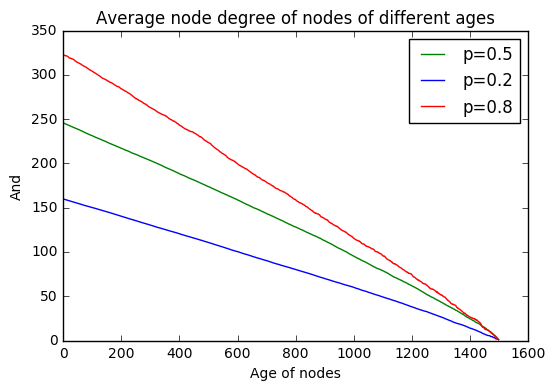

In [23]:
age=range(0,N-start+1)
plt.plot(age, deg1[::-1],'g', label='p=0.5')
plt.plot(age, deg2[::-1], c='b', label='p=0.2')
plt.plot(age, deg3[::-1], c='r', label='p=0.8')
plt.title('Average node degree of nodes of different ages')
plt.xlabel(u'Age of nodes')
plt.ylabel(u'And')
plt.legend()
plt.show()

As expected, as q approaches 0, connection copying occurs more rarely, and most
vertices have similar degrees. In contrast, as q approaches 1, very few connections are rewired,
leading to a greater concentration of edges among the oldest vertices.